# Classwise - Gridsearch

This notebook discusses Multi-label classification using gridsearch for the [academia.stackexchange.com](https://academia.stackexchange.com/).

A classifier is trained for each label individually. The best parameter is obtained for each classifier using *Gridsearch*.

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Training](#training)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import load
from academia_tag_recommender.experiments.experimental_classifier import available_classifier_paths

RANDOM_STATE = 0
ggplot_styles = {
    'axes.axisbelow': 'True',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.grid.axis': 'y',
    'figure.figsize': (16, 8),
    'font.size': 18, 
    'grid.color': 'gainsboro',
    'grid.linewidth': 0.5,
    'lines.linestyle': '-',
    'lines.linewidth': 0.7,
}
plt.rcParams.update(ggplot_styles)

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.experiments.data import ExperimentalData

ed = ExperimentalData.load()
X_train, X_test, y_train, y_test = ed.get_train_test_set()

In [3]:
from academia_tag_recommender.experiments.transformer import BagOfWordsTransformer, Word2VecTransformer, FastTextTransformer, Doc2VecTransformer
from academia_tag_recommender.experiments.experimental_classifier import ExperimentalClassifier

<a id='data_preparation'/>

## Data Preparation

In [4]:
def create_classifier(classifier_options, name, embedding=''):
    classifier = ClasswiseClassifier(name, classifier_options, embedding)
    experimental_classifier = ExperimentalClassifier.load(transformer, classifier, name)
    #experimental_classifier.train(train, y_train)
    #experimental_classifier.score(test, y_test)
    print('Training: {}s'.format(experimental_classifier.training_time))
    print('Test: {}s'.format(experimental_classifier.test_time))
    experimental_classifier.evaluation.print_stats()

<a id='training'/>

## Training

The [Classwise Classifier](../classwise_classifier.py) is trained for three different classification methods and their specific tuning parameter is found using [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV).
- Linear SVC, optimizing parameter `C`
- Logistic Regression, optimizing parameter `C`
- MLPClassifier, optimizing parameter `alpha`

[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall#sklearn.metrics.recall_score) is used as  the scoring-function for the optimization. For reasons of that decision see [notebook 3.0](3.0-me-evaluation-metrics.ipynb).

In [5]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

**Word2Vec**

In [6]:
transformer = Word2VecTransformer.load('word2vec')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [7]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-gridsearched', 'word2vec')

Training: 1274.2453153133392s
Test: 2.2549941539764404s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011817603258448418     0.0750906892382104       0.3732446594115276       0.20212212817412334      0.24572349858927847      
micro                                                            0.7087832973362131       0.1885202738283307       0.2978256759311779       
macro                                                            0.29858048814861954      0.08313116314841551      0.11678103267955685      


In [8]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-gridsearched', 'word2vec')

Training: 590.4930658340454s
Test: 2.27874493598938s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011821421752688856     0.07605804111245465      0.39491334139459894      0.2262595727529222       0.26813132185562655      
micro                                                            0.6737759086812857       0.2147541768394849       0.32569789813772826      
macro                                                            0.3463503090242874       0.09796828246878693      0.13985128740779132      


In [9]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=True, parameter={'alpha':[0.0001, 0.001, 0.01, 0.1]})]
#create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-gridsearched', 'word2vec')

**Doc2Vec**

In [10]:
transformer = Doc2VecTransformer.load('doc2vec')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [11]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-gridsearched', 'doc2vec')

Training: 9231.67267203331s
Test: 3.512507438659668s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012826322153630752     0.05646916565900847      0.2315850463522773       0.1279101168883515       0.1535208973479832       
micro                                                            0.5813953488372093       0.12566422519029155      0.20666036844591407      
macro                                                            0.2524874895881524       0.051751929930332174     0.07505883348928495      


In [12]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-gridsearched', 'doc2vec')

Training: 611.955454826355s
Test: 3.782128095626831s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013623751034175523     0.05344619105199516      0.2698037510990957       0.18500201531640464      0.1982128547318447       
micro                                                            0.4688102119460501       0.1863660299679257       0.2667077724111945       
macro                                                            0.286196330794508        0.12228253360644711      0.15743864959587228      


In [13]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=True, parameter={'alpha':[0.0001, 0.001, 0.01, 0.1]})]
#create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-gridsearched', 'doc2vec')

**FastText**

In [14]:
transformer = FastTextTransformer.load('fasttext')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [15]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-gridsearched', 'fasttext')

Training: 1267.8983483314514s
Test: 2.364654302597046s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011696047858461147     0.08246674727932285      0.3901753325272067       0.22004635227730754      0.2627971632022418       
micro                                                            0.7088670770254534       0.2039829575374599       0.31680297397769513      
macro                                                            0.3895646771627874       0.11863716552114         0.16550052330670215      


In [16]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-gridsearched', 'fasttext')

Training: 641.3458802700043s
Test: 2.400759220123291s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011764144339082289     0.0807738814993954       0.40299072954453846      0.23886739218057232      0.2788257423082091       
micro                                                            0.6718615956534172       0.22495093111206854      0.33705124986550944      
macro                                                            0.4058765073843776       0.11446887873127018      0.16269903654295703      


In [17]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=True, parameter={'alpha':[0.0001, 0.001, 0.01, 0.1]})]
#create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-gridsearched', 'fasttext')

**TFIDF**

In [18]:
transformer = BagOfWordsTransformer.load('tfidf', 'basic', 'lsa')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [19]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-gridsearched', 'tfidf')

Training: 19034.327134132385s
Test: 17.818149089813232s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.0126697638897728       0.0709794437726723       0.4688766050555651       0.3585126964933495       0.3748068960463156       
micro                                                            0.535758547787417        0.35181195844702956      0.42472403629428424      
macro                                                            0.5314120266571835       0.25117176234699096      0.32102374955235696      


In [20]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-gridsearched', 'tfidf')

Training: 14589.499669790268s
Test: 25.487332820892334s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011219372494113155     0.0939540507859734       0.4927085852478839       0.3171886336154776       0.35889004049826295      
micro                                                            0.6690871369294605       0.3087749533247164       0.4225490517213142       
macro                                                            0.5480805166166945       0.195688454701095        0.2684705725700072       


In [21]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=True, parameter={'alpha':[0.0001, 0.001, 0.01, 0.1]})]
#create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-gridsearched', 'tfidf')

**Count**

In [22]:
transformer = BagOfWordsTransformer.load('count', 'basic', 'lsa')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [23]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-gridsearched', 'count')

Training: 36076.83434724808s
Test: 17.162359714508057s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015807293323999237     0.04087061668681983      0.3968868378027991       0.37994357114066907      0.35388455156290705      
micro                                                            0.39969519939039877      0.3766575709703672       0.3878345738650367       
macro                                                            0.42247762650679155      0.28141491241670363      0.3250002303558698       


In [24]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-gridsearched', 'count')

Training: 23162.33934545517s
Test: 18.50114941596985s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01375421625405715      0.0592503022974607       0.4365985568999343       0.36295243853284964      0.36288749635424367      
micro                                                            0.47702281828004833      0.3592800038297669       0.4098629239255093       
macro                                                            0.4612788389317345       0.2590353886338991       0.31765900621776355      


In [25]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=True, parameter={'alpha':[0.0001, 0.001, 0.01, 0.1]})]
#create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-gridsearched', 'count')

<a id='evaluation'/>

## Evaluation

In [26]:
paths = available_classifier_paths('gridsearched')
paths = [path for path in paths if 'multiple' not in path.name]

In [27]:
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    name = re.findall(r'\(([\w,\d]*)\)', str(path))[0]
    transformer = re.findall(r'=([\w,\d]*)', str(path))[1]
    evals.append([name + ' ' + transformer, evaluation])

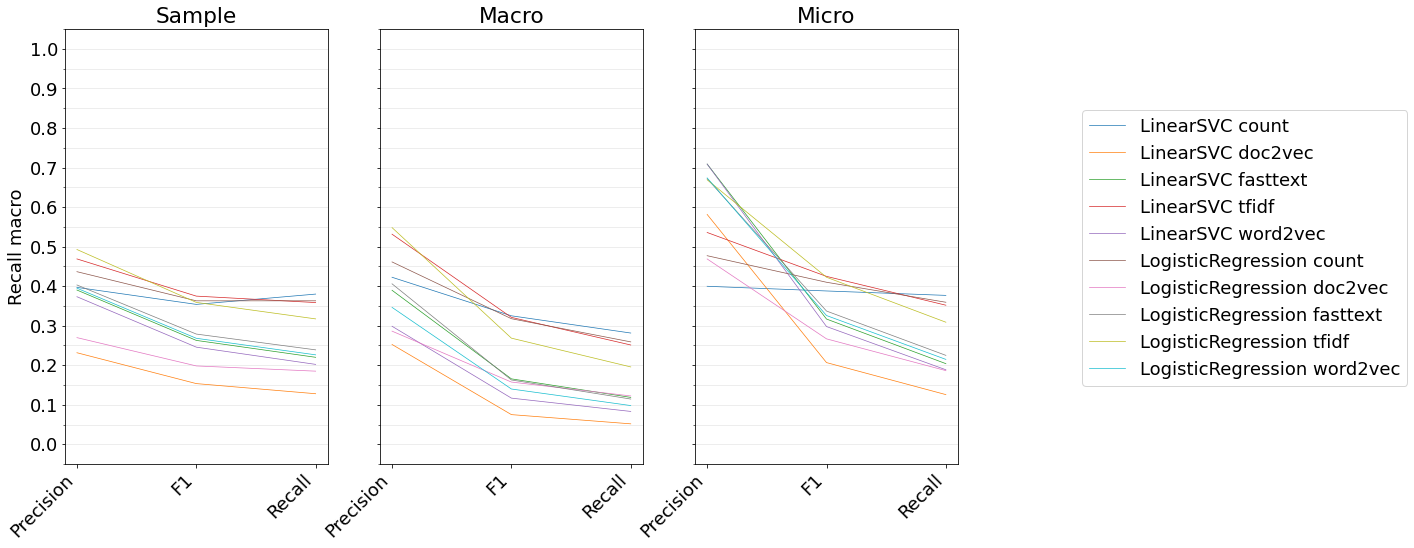

In [28]:
from matplotlib.ticker import MultipleLocator
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, sharey=True)
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for ax in axes:
    ax.set_xticklabels(x_, rotation=45, ha='right')
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.set_ylim(-0.05, 1.05)
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro])
axes[0].set_ylabel('Recall macro')
fig.legend(bbox_to_anchor=(1,0.5), loc='center left')
plt.show()

In [29]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [30]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - np.absolute(orig - prediction)
    return np.average(l, axis=0)

In [31]:
from sklearn.metrics import classification_report
classwise_results = []
for path in top_3:
    clf = load(path)
    test = clf.transform(X_test)
    prediction = clf.predict(test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    name = re.findall(r'\(([\w,\d]*)\)', str(path))[0]
    transformer = re.findall(r'=([\w,\d]*)', str(path))[1]
    classwise_results.append((name + ' ' + transformer, classwise_report))

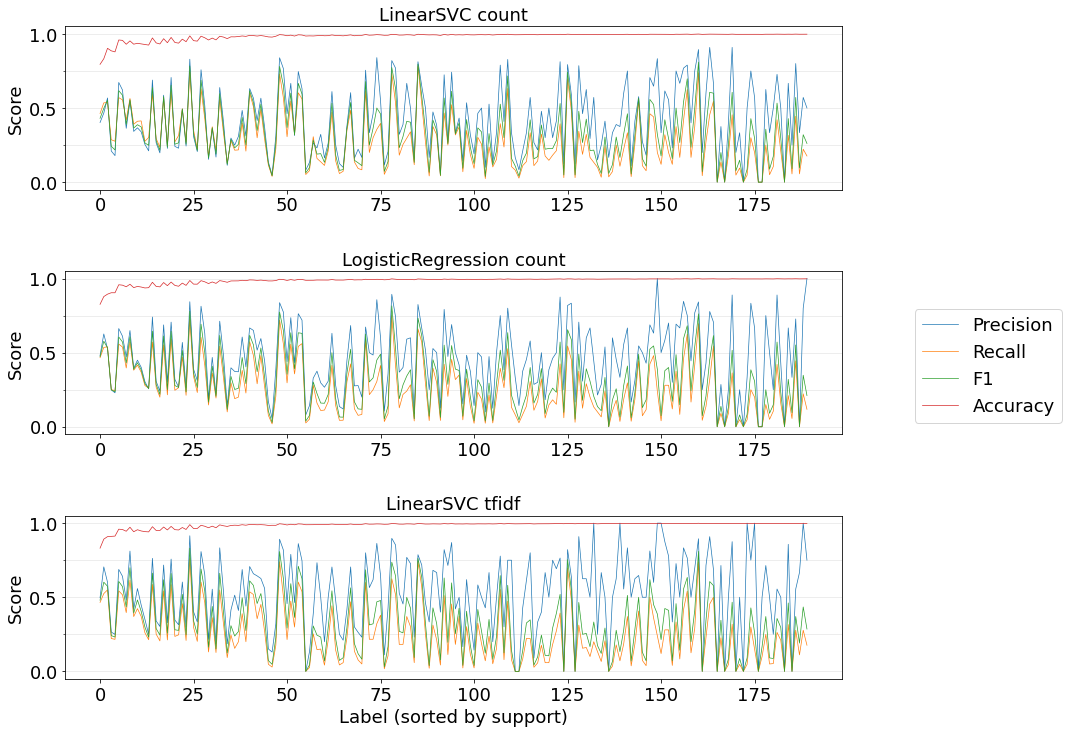

In [32]:
x_ = np.arange(0, len(y_test[0]))
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
for i, classwise_result in enumerate(classwise_results):
    name, results = classwise_result
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    axes[i].set_title(name, fontsize=18)
    axes[i].plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    axes[i].plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    axes[i].plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    axes[i].plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    axes[i].set_ylabel('Score')
    axes[i].yaxis.set_major_locator(MultipleLocator(0.5))
    axes[i].yaxis.set_minor_locator(MultipleLocator(0.25))
    axes[i].set_ylim(-0.05, 1.05)
axes[2].set_xlabel('Label (sorted by support)')
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='right')
plt.subplots_adjust(hspace=0.5, right=0.8)
plt.show()